<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/python_/blob/main/association_store_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## 연관규칙 실습
## 연관규칙 학습
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

def p(str):
    print(str, '\n')

In [14]:
# 데이터 프레임


df = pd.read_csv('/content/store_data.csv')
p(df.head)
df.info()


<bound method NDFrame.head of               shrimp            almonds      avocado    vegetables mix  \
0            burgers          meatballs         eggs               NaN   
1            chutney                NaN          NaN               NaN   
2             turkey            avocado          NaN               NaN   
3      mineral water               milk   energy bar  whole wheat rice   
4     low fat yogurt                NaN          NaN               NaN   
...              ...                ...          ...               ...   
7495          butter         light mayo  fresh bread               NaN   
7496         burgers  frozen vegetables         eggs      french fries   
7497         chicken                NaN          NaN               NaN   
7498        escalope          green tea          NaN               NaN   
7499            eggs    frozen smoothie  yogurt cake    low fat yogurt   

     green grapes whole weat flour yams cottage cheese energy drink  \
0         

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# chipotle.csv 데이터 구성

df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil'],
      dtype='object')

In [19]:
# 각 셀을 True/False로 변환 (NaN은 False, 나머지는 True)
df_binary = df.notnull()

# 상위 5개의 행을 출력하여 확인
print(df_binary.head())


   shrimp  almonds  avocado  vegetables mix  green grapes  whole weat flour  \
0    True     True     True           False         False             False   
1    True    False    False           False         False             False   
2    True     True    False           False         False             False   
3    True     True     True            True          True             False   
4    True    False    False           False         False             False   

    yams  cottage cheese  energy drink  tomato juice  low fat yogurt  \
0  False           False         False         False           False   
1  False           False         False         False           False   
2  False           False         False         False           False   
3  False           False         False         False           False   
4  False           False         False         False           False   

   green tea  honey  salad  mineral water  salmon  antioxydant juice  \
0      False  False 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
from mlxtend.frequent_patterns import apriori, association_rules

# 최소 지지도를 기준으로 빈번한 항목 집합 도출
frequent_itemsets = apriori(df_binary, min_support=0.01, use_colnames=True)

# 연관 규칙 도출
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# 상위 5개의 규칙을 출력
print(rules.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  antecedents       consequents  antecedent support  consequent support  \
0    (shrimp)         (almonds)            1.000000            0.766133   
1   (almonds)          (shrimp)            0.766133            1.000000   
2    (shrimp)         (avocado)            1.000000            0.585067   
3   (avocado)          (shrimp)            0.585067            1.000000   
4    (shrimp)  (vegetables mix)            1.000000            0.445867   

    support  confidence  lift  leverage  conviction  zhangs_metric  
0  0.766133    0.766133   1.0       0.0         1.0            0.0  
1  0.766133    1.000000   1.0       0.0         inf            0.0  
2  0.585067    0.585067   1.0       0.0         1.0            0.0  
3  0.585067    1.000000   1.0       0.0         inf            0.0  
4  0.445867    0.445867   1.0       0.0         1.0            0.0  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


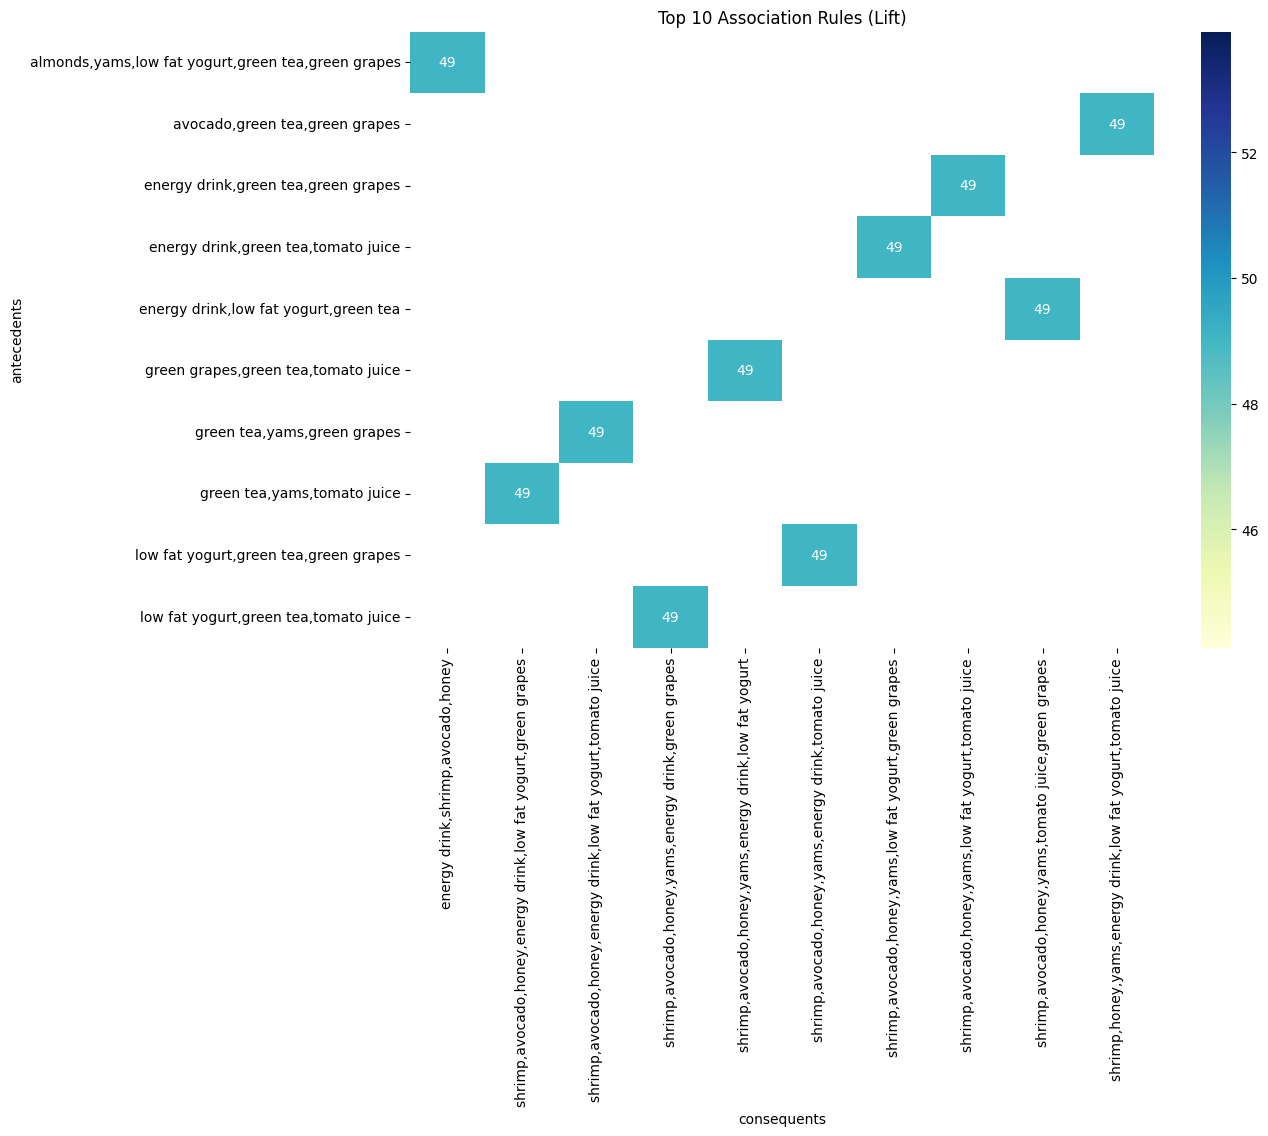

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 규칙 중 상위 10개의 규칙만 추출
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Antecedents와 Consequents를 문자열로 변환
top_rules['antecedents'] = top_rules['antecedents'].apply(lambda x: ','.join(list(x)))
top_rules['consequents'] = top_rules['consequents'].apply(lambda x: ','.join(list(x)))

# 피벗 테이블 생성
pivot = top_rules.pivot(index='antecedents', columns='consequents', values='lift')

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.title('Top 10 Association Rules (Lift)')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


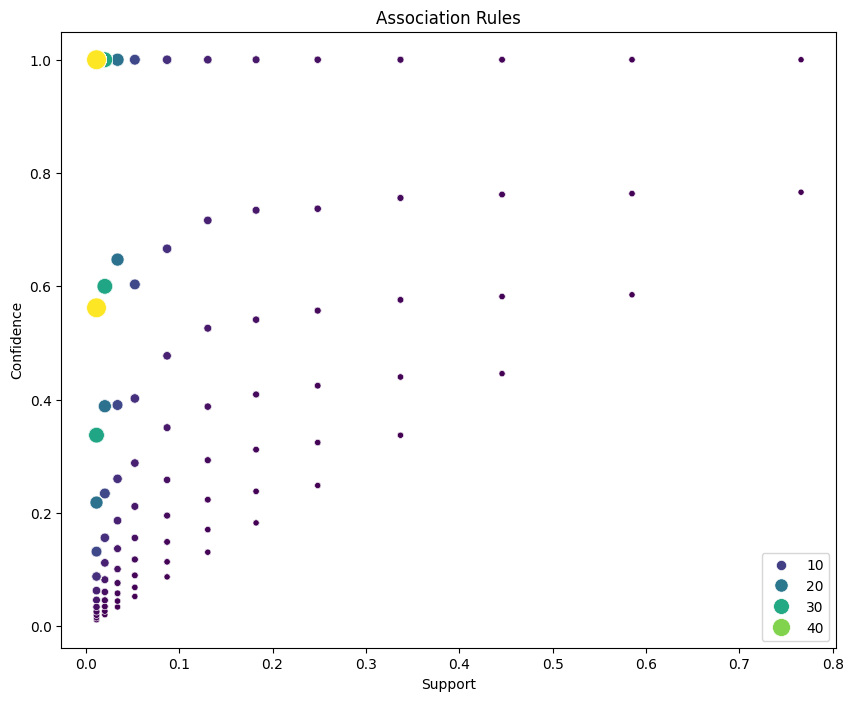

In [22]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="support", y="confidence", size="lift", hue="lift", data=rules, palette='viridis', sizes=(20, 200))

plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(loc='best')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


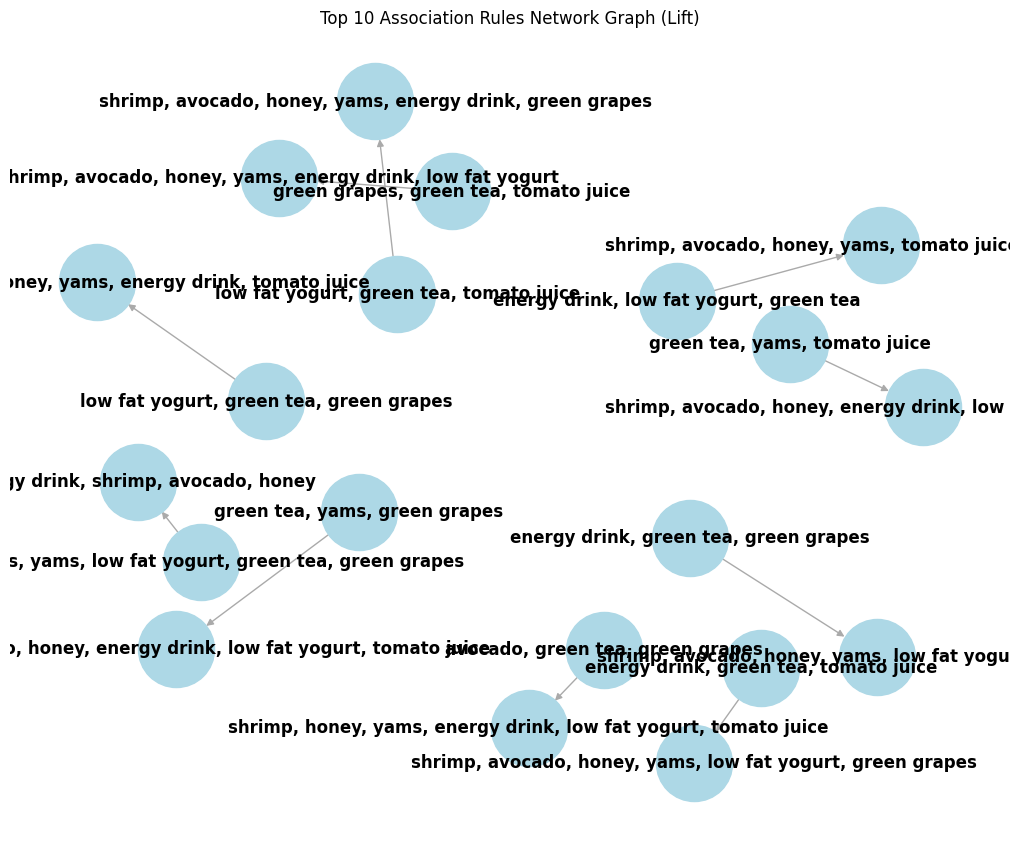

In [26]:
import networkx as nx

# 규칙 중 상위 10개의 규칙만 추출
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# 네트워크 그래프 생성
G = nx.DiGraph()

for i, row in top_rules.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=row['lift'])

# 그래프 그리기
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=2)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold', edge_color='#AAAAAA')

plt.title('Top 10 Association Rules Network Graph (Lift)')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-24-20864111760d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lift', y=top_rules.index, data=top_rules, palette='viridis')


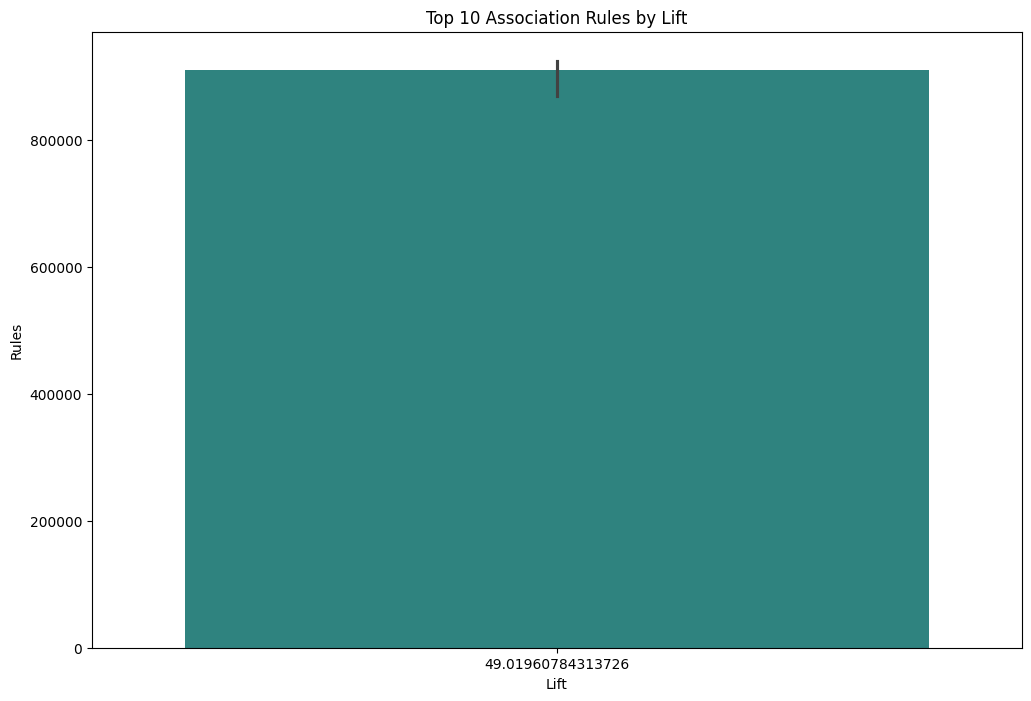

In [24]:
# 상위 10개의 규칙 추출
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x='lift', y=top_rules.index, data=top_rules, palette='viridis')

plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.show()
